In [1]:
import numpy as np
from utils.QAgent import *
from utils.localizationNet import *
import matplotlib.pyplot as py
from utils.Utils import generate_square as GS
import random
from model.model import MSE


In [2]:
sampling_grid=generate_sampling_grid()

Consider a square

In [3]:
square=GS(14,2) 


Transpose the square

In [17]:
identity= np.array([[1,0,0],[0,1,0],[0,0,1]]) 
affine1=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
affine2=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
mod=identity+affine1
resultant_affine=np.dot ((affine1+identity),(affine2+identity)) 
print(resultant_affine)


[[1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]


In [18]:
affines =[]
affine1=np.array( [[0,0,0.5],[0,0,0],[0,0,0]])
affine2=np.array( [[0,0,0],[0,0,0.5],[0,0,0]])
affines.append(affine1)
affines.append(affine2) 

In [19]:
manipulation3 = np.ceil(affine_transformation(square,resultant_affine,sampling_grid)) #for data processing, all values are inputted using ceil. 
#py.imshow(manipulation3.reshape(28,28))
target=manipulation3 #This will be our target. 


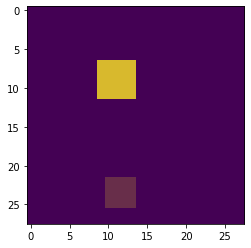

In [20]:
py.imshow(target.reshape(28,28))
py.imshow(square.reshape(28,28),alpha=0.2)

### Steps  
1) Load up Q values for a given state. They will be zero. Initialize with two actions (there needs to be a choice?)

2) Randomize a value, 
    a)if the value is <$\epsilon$ take the action max (Q(state)) 
    b)if the value is >$\epsilon$ take a random action 

3) If state does not exist, add new state. Check MSE in that state, update Q(state) with = Q(state) + sum (reward for Q(state')) AND reduce $\epsilon$ by $\delta \epsilon $ IF MSE has reduced. Else do nothing. 

4) Repeat step 2


### STEP1: Load up Q values and add most current state. Since we are looking at MSE it looks up only 1s

In [21]:
agent = Q_agent_base(starting_actions=2) 

In [22]:
current_state = np.array2string(square.flatten())
agent.add_state(current_state)
transformation=square

### Step 2: Randomize a value 

In [31]:

decision = random.uniform(0,1)
episilon = 1
if decision < episilon: 
    #do a random choice 
    action=random.randint(1,agent.total_actions()) #will randomize actions.
else: 
    action=agent.return_lowest (current_state) #lowest in this context is MSE.

    


###  Step 3: Implement the action

In [32]:
#Action Chosen: 
print(action)

2


In [33]:



transformation= affine_transformation(transformation.reshape(28,28),identity+affines[action-1],sampling_grid)

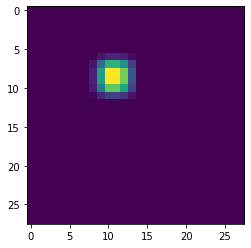

In [34]:
py.imshow(transformation.reshape(28,28))

### Step 4: Check if state exists, if it does not add to list of states.

In [35]:
next_state =np.array2string( np.ceil(transformation.flatten()))
if (agent.search(next_state)==-1) : #if state does not exist. 
    agent.add_state(next_state)




### Step 5: Check MSE to ensure that MSE has reduced. If it has then change the value 

In [37]:
loss = MSE (target.flatten(), transformation.flatten() )
print(loss)

0.010426365265922057


In [29]:
if agent.return_Q(current_state,action-1) > loss: #if the loss is reduced. 
    reward = loss+agent.return_lowest(next_state) #kind of like bellman eqn
    agent.reward(current_state,action,reward) 
else: 
    print('nothing')

current_state=next_state


In [43]:
agent.table()

array([[0., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [42]:
agent.return_lowest(current_state)

1.0